New notebook for Datavis


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/Team_Ass_1.csv')

In [ ]:
df.isnull().sum()


Unnamed: 0       0
Sl. No.          0
YEAR             0
MONTH           18
DATE            57
Mw            2504
LAT (N)          0
LONG (E)         0
DEPTH (km)    2178
REFERENCE     1582
dtype: int64

Since Mw column have 1521 null values and the data-set is comparatively very large hence we removed them.


In [ ]:
df.dropna(axis=0,subset=['Mw'],inplace=True)

In [ ]:
df.isnull().sum()

Unnamed: 0       0
Sl. No.          0
YEAR             0
MONTH            8
DATE            11
Mw               0
LAT (N)          0
LONG (E)         0
DEPTH (km)    1257
REFERENCE     1582
dtype: int64



```
`# This is formatted as code`
```

Since months is not so important field and has only 8 remaining null values, it would be right to remove them too and so is the case with DATE

In [ ]:
df.dropna(axis=0,subset=['DATE'],inplace=True)

In [ ]:
df.dropna(axis=0,subset=['MONTH'],inplace=True)

In [ ]:
df.isnull().sum()

Unnamed: 0       0
Sl. No.          0
YEAR             0
MONTH            0
DATE             0
Mw               0
LAT (N)          0
LONG (E)         0
DEPTH (km)    1252
REFERENCE     1582
dtype: int64

In [ ]:
df.MONTH

0          0
1          0
2          0
3          5
4          5
        ... 
52981    7.0
52982    7.0
52983    7.0
52984    7.0
52985    7.0
Name: MONTH, Length: 50471, dtype: object

Data cleaning needs to be done here as Months need to be between 1-12 only

In [ ]:
check = dict()
for i in df.MONTH:
  check[i] = 0
for i in df.MONTH:
  check[i] += 1

In [ ]:
check

{' ': 2,
 '0': 8,
 '00': 25,
 '01': 1565,
 '02': 1428,
 '03': 1606,
 '04': 1621,
 '05': 1532,
 '06': 1307,
 '07': 1544,
 '08': 1554,
 '09': 1358,
 '1': 1167,
 '1.0': 3443,
 '10': 2239,
 '10.0': 2206,
 '11': 2595,
 '11.0': 1056,
 '12': 2554,
 '12.0': 2618,
 '2': 1031,
 '2.0': 1449,
 '3': 1139,
 '3.0': 1751,
 '4': 1129,
 '4.0': 1497,
 '5': 991,
 '5.0': 1301,
 '6': 891,
 '6.0': 1221,
 '7': 1139,
 '7.0': 1284,
 '8': 1043,
 '8.0': 1200,
 '9': 950,
 '9.0': 1027}

O, 00,' ', these need to be removed as they imply no month, and number of these values are only 2+8+25 which can be removed


In [ ]:
df.drop(df[df['MONTH'] == '0'].index,inplace=True)


In [ ]:
df.drop(df[df['MONTH'] == ' '].index,inplace=True)


In [ ]:
df.drop(df[df['MONTH'] == '00'].index,inplace=True)


In [ ]:
check = dict()
for i in df.MONTH:
  check[i] = 0
for i in df.MONTH:
  check[i] += 1

In [ ]:
check


{'01': 1565,
 '02': 1428,
 '03': 1606,
 '04': 1621,
 '05': 1532,
 '06': 1307,
 '07': 1544,
 '08': 1554,
 '09': 1358,
 '1': 1167,
 '1.0': 3443,
 '10': 2239,
 '10.0': 2206,
 '11': 2595,
 '11.0': 1056,
 '12': 2554,
 '12.0': 2618,
 '2': 1031,
 '2.0': 1449,
 '3': 1139,
 '3.0': 1751,
 '4': 1129,
 '4.0': 1497,
 '5': 991,
 '5.0': 1301,
 '6': 891,
 '6.0': 1221,
 '7': 1139,
 '7.0': 1284,
 '8': 1043,
 '8.0': 1200,
 '9': 950,
 '9.0': 1027}

Converting the datatype into int will get all the values from 1-12

In [ ]:
df.MONTH.astype(float)

3        5.0
4        5.0
9        6.0
17       2.0
20       2.0
        ... 
52981    7.0
52982    7.0
52983    7.0
52984    7.0
52985    7.0
Name: MONTH, Length: 50436, dtype: float64

In [ ]:
df['MONTH'] = df['MONTH'].astype(float)

In [ ]:
df

,Unnamed: 0,Sl. No.,YEAR,MONTH,DATE,Mw,LAT (N),LONG (E),DEPTH (km),REFERENCE
3,3,4,26,5.0,10.0,6.1397,17.3,80.1,NaN,NEIC
4,4,5,26,5.0,10.0,6.1397,26.0,97.0,80.0,G-R
9,9,10,819,6.0,1.0,7.3000,65.4,36.4,0.0,Dr STGR
17,17,3,1102,2.0,28.0,5.6000,62.2,34.4,0.0,Dr STGR
20,20,6,1364,2.0,10.0,5.9000,61.7,34.9,0.0,Dr STGR
...,...,...,...,...,...,...,...,...,...,...
52981,52984,52970,2019,7.0,28.0,3.2000,32.8ï¿½N,78.4ï¿½E,10.0,NaN
52982,52985,52971,2019,7.0,28.0,3.6000,25.5ï¿½N,90.4ï¿½E,70.0,NaN
52983,52986,52972,2019,7.0,28.0,4.0000,23.2ï¿½N,86.5ï¿½E,22.0,NaN
52984,52987,52973,2019,7.0,29.0,4.3000,32.8ï¿½N,76.4ï¿½E,20.0,NaN


In [ ]:
df.MONTH =  pd.to_numeric(df.MONTH,downcast='integer')

In [ ]:
df.MONTH.astype

<bound method NDFrame.astype of 3        5
4        5
9        6
17       2
20       2
        ..
52981    7
52982    7
52983    7
52984    7
52985    7
Name: MONTH, Length: 50436, dtype: int8>

In [ ]:
df.isnull().sum()

Unnamed: 0       0
Sl. No.          0
YEAR             0
MONTH            0
DATE             0
Mw               0
LAT (N)          0
LONG (E)         0
DEPTH (km)    1251
REFERENCE     1582
dtype: int64

In [ ]:
df.YEAR.astype


<bound method NDFrame.astype of 3          26
4          26
9         819
17       1102
20       1364
         ... 
52981    2019
52982    2019
52983    2019
52984    2019
52985    2019
Name: YEAR, Length: 50436, dtype: int64>

In [ ]:
df[df['YEAR'] < 1600]

,Unnamed: 0,Sl. No.,YEAR,MONTH,DATE,Mw,LAT (N),LONG (E),DEPTH (km),REFERENCE
3,3,4,26,5,10.0,6.1397,17.3,80.1,NaN,NEIC
4,4,5,26,5,10.0,6.1397,26.0,97.0,80.0,G-R
9,9,10,819,6,1.0,7.3000,65.4,36.4,0.0,Dr STGR
17,17,3,1102,2,28.0,5.6000,62.2,34.4,0.0,Dr STGR
20,20,6,1364,2,10.0,5.9000,61.7,34.9,0.0,Dr STGR
21,21,7,1411,9,29.0,7.7000,90.2,30.0,0.0,Dr STGR
24,24,10,1504,6,1.0,7.7000,69.0,34.5,0.0,Dr STGR
25,25,11,1505,7,6.0,8.0000,69.0,34.0,0.0,Dr STGR
26,26,12,1505,7,6.0,5.0000,78.0,27.2,0.0,Dr STGR
27,27,13,1512,10,8.0,6.8000,98.5,25.0,0.0,Dr STGR


In [ ]:
df[df['DEPTH (km)'] < 0.4]

,Unnamed: 0,Sl. No.,YEAR,MONTH,DATE,Mw,LAT (N),LONG (E),DEPTH (km),REFERENCE
9,9,10,819,6,1.0,7.3,65.4,36.4,0.0,Dr STGR
17,17,3,1102,2,28.0,5.6,62.2,34.4,0.0,Dr STGR
20,20,6,1364,2,10.0,5.9,61.7,34.9,0.0,Dr STGR
21,21,7,1411,9,29.0,7.7,90.2,30.0,0.0,Dr STGR
24,24,10,1504,6,1.0,7.7,69.0,34.5,0.0,Dr STGR
...,...,...,...,...,...,...,...,...,...,...
50349,50352,50338,2008,12,29.0,4.8,99.440,019.72,0.0,Dr STGR
50351,50354,50340,2008,12,29.0,4.3,70.070,036.50,0.0,Dr STGR
50353,50356,50342,2008,12,29.0,5.2,64.430,023.45,0.0,Dr STGR
50357,50360,50346,2008,12,31.0,4.8,67.500,030.45,0.0,Dr STGR


In [ ]:
df['DEPTH (km)'].describe()


count    49185.000000
mean        45.677553
std         56.108936
min          0.000000
25%         10.000000
50%         33.000000
75%         55.300000
max        831.200000
Name: DEPTH (km), dtype: float64

In [ ]:
df['DEPTH (km)'].isnull().sum()

1251

Ther are 1251 entries which are null in the DEPTH column, these need to be filled with some value. Since the data has a variance of 56, which very high, filling it with the mean will not be the right method

In [ ]:
df[df['YEAR'] < 1600]['DEPTH (km)'].describe()

count    11.000000
mean      7.272727
std      24.120908
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      80.000000
Name: DEPTH (km), dtype: float64

In [ ]:
df[df['YEAR'].between(1600,1700,inclusive=True)]

,Unnamed: 0,Sl. No.,YEAR,MONTH,DATE,Mw,LAT (N),LONG (E),DEPTH (km),REFERENCE
32,32,18,1668,5,6.0,7.8,19.1,73.2,NaN,NEIC
34,34,20,1669,6,22.0,6.5,77.0,35.0,0.0,Dr STGR
35,35,21,1669,6,23.0,6.5,72.3,33.9,0.0,Dr STGR
40,40,26,1688,6,14.0,6.5,99.9,26.5,0.0,Dr STGR
41,41,27,1697,2,13.0,7.2,94.6,27.75,0.0,Dr STGR


In [ ]:
df[df['YEAR'].between(1700,1800,inclusive=True)]


,Unnamed: 0,Sl. No.,YEAR,MONTH,DATE,Mw,LAT (N),LONG (E),DEPTH (km),REFERENCE
43,43,29,1705,2,4.0,7.0,72.15,21.75,0.0,Dr STGR
45,45,31,1720,7,15.0,6.5,77.1,28.37,0.0,Dr STGR
47,47,33,1736,3,24.0,5.8,74.5,34.6,0.0,Dr STGR
49,49,35,1737,10,11.0,7.2,88.4,22.6,0.0,Dr STGR
51,51,37,1751,1,1.0,7.0,80.0,31.3,0.0,Dr STGR
52,52,38,1751,5,25.0,6.8,99.9,26.5,0.0,Dr STGR
53,53,39,1751,12,9.0,4.3,73.2,19.1,0.0,Dr STGR
56,56,42,1752,1,5.0,4.3,73.3,19.1,0.0,Dr STGR
57,57,43,1752,2,5.0,4.3,73.4,18.7,0.0,Dr STGR
60,60,46,1762,4,2.0,7.5,92.0,22.0,0.0,Dr STGR


In [ ]:
df1 = df[df['YEAR'].between(1800,1900,inclusive=True)]


In [ ]:
df1['DEPTH (km)'].describe()

count    226.000000
mean       0.575221
std        6.119267
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       70.000000
Name: DEPTH (km), dtype: float64

In [ ]:
df1 = df[df['YEAR'].between(1900,2021,inclusive=True)]


In [ ]:
df1['DEPTH (km)'].describe()

count    48927.000000
mean        45.915556
std         56.158812
min          0.000000
25%         10.000000
50%         33.000000
75%         56.000000
max        831.200000
Name: DEPTH (km), dtype: float64

In [ ]:
df1.isnull().sum()

Unnamed: 0       0
Sl. No.          0
YEAR             0
MONTH            0
DATE             0
Mw               0
LAT (N)          0
LONG (E)         0
DEPTH (km)    1068
REFERENCE     1582
dtype: int64

In [ ]:
df['DEPTH (km)'].describe()

count    49185.000000
mean        45.677553
std         56.108936
min          0.000000
25%         10.000000
50%         33.000000
75%         55.300000
max        831.200000
Name: DEPTH (km), dtype: float64

In [ ]:
df.corr()

,Unnamed: 0,Sl. No.,YEAR,MONTH,DATE,Mw,DEPTH (km)
Unnamed: 0,1.000000,1.000000,0.607345,-0.020447,0.042048,-0.187084,-0.184452
Sl. No.,1.000000,1.000000,0.607341,-0.020447,0.042048,-0.187084,-0.184452
YEAR,0.607345,0.607341,1.000000,-0.012127,0.038463,-0.227746,-0.057820
MONTH,-0.020447,-0.020447,-0.012127,1.000000,0.004181,0.014828,0.009270
DATE,0.042048,0.042048,0.038463,0.004181,1.000000,0.029037,-0.034577
Mw,-0.187084,-0.187084,-0.227746,0.014828,0.029037,1.000000,-0.026123
DEPTH (km),-0.184452,-0.184452,-0.057820,0.009270,-0.034577,-0.026123,1.000000


In [ ]:
df.Mw.describe()

count    50436.000000
mean         4.576671
std          0.617067
min          1.682800
25%          4.200000
50%          4.500000
75%          4.884400
max          9.100000
Name: Mw, dtype: float64

In [ ]:
def targe(x):
  try:
    if x['Mw'] < 4.5:
      return 0
    else:
      return 1
  except:
    print('Except')
    return 0

In [ ]:
df['target'] = 0

In [ ]:
df['target'] = df.apply(lambda x : targe(x),axis=1)

In [ ]:
df[df['Mw'] <= 4.5].count()

Unnamed: 0    27344
Sl. No.       27344
YEAR          27344
MONTH         27344
DATE          27344
Mw            27344
LAT (N)       27344
LONG (E)      27344
DEPTH (km)    26920
REFERENCE     26180
target        27344
dtype: int64

In [ ]:
df.corr()

,Unnamed: 0,Sl. No.,YEAR,MONTH,DATE,Mw,DEPTH (km),target
Unnamed: 0,1.000000,1.000000,0.607345,-0.020447,0.042048,-0.187084,-0.184452,-0.168586
Sl. No.,1.000000,1.000000,0.607341,-0.020447,0.042048,-0.187084,-0.184452,-0.168586
YEAR,0.607345,0.607341,1.000000,-0.012127,0.038463,-0.227746,-0.057820,-0.140220
MONTH,-0.020447,-0.020447,-0.012127,1.000000,0.004181,0.014828,0.009270,0.009177
DATE,0.042048,0.042048,0.038463,0.004181,1.000000,0.029037,-0.034577,0.039471
Mw,-0.187084,-0.187084,-0.227746,0.014828,0.029037,1.000000,-0.026123,0.720023
DEPTH (km),-0.184452,-0.184452,-0.057820,0.009270,-0.034577,-0.026123,1.000000,-0.066619
target,-0.168586,-0.168586,-0.140220,0.009177,0.039471,0.720023,-0.066619,1.000000


In [ ]:
df.reset_index(inplace=True)

In [ ]:
a=0
g = 0
neg = 0
arr = []
for i in range(len(df['LAT (N)'])):
  try:
    check = float(df['LAT (N)'][i])
    if check > 90:
      neg += 1
  except:
    g += 1
    s = df['LAT (N)'][i]
    a = ""
    for j in s:
      if j in ['0','1','2','3','4','5','6','7','8','9'] or j == '.':
        a += j
      elif j == ' ':
        pass
      else:
        break
    arr.append(a)
    df['LAT (N)'][i] = a
print(neg)
print(g)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


13523
2418


In [ ]:
a=0
g = 0
neg = 0
arr = []
for i in range(len(df['LONG (E)'])):
  try:
    check = float(df['LONG (E)'][i])
    if check > 90:
      neg += 1
  except:
    g += 1
    s = df['LONG (E)'][i]
    a = ""
    for j in s:
      if j in ['0','1','2','3','4','5','6','7','8','9'] or j == '.':
        a += j
      elif j == ' ':
        pass
      else:
        break
    arr.append(a)
    df['LONG (E)'][i] = a
print(neg)
print(g)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


11370
2418


In [ ]:
df['LONG (E)'] = df['LONG (E)'].astype(float)

In [ ]:
df['LAT (N)'] = df['LAT (N)'].astype(float)

In [ ]:
df.drop(['Mw'],axis = 1,inplace=True)

In [ ]:
df.head()


,index,Unnamed: 0,Sl. No.,YEAR,MONTH,DATE,LAT (N),LONG (E),DEPTH (km),REFERENCE,target
0,3,3,4,26,5,10.0,17.3,80.1,NaN,NEIC,1
1,4,4,5,26,5,10.0,26.0,97.0,80.0,G-R,1
2,9,9,10,819,6,1.0,65.4,36.4,0.0,Dr STGR,1
3,17,17,3,1102,2,28.0,62.2,34.4,0.0,Dr STGR,1
4,20,20,6,1364,2,10.0,61.7,34.9,0.0,Dr STGR,1


In [ ]:
df.isnull().sum()


index            0
Unnamed: 0       0
Sl. No.          0
YEAR             0
MONTH            0
DATE             0
LAT (N)          0
LONG (E)         0
DEPTH (km)    1251
REFERENCE     1582
target           0
dtype: int64

Sine number of null rows of DEPTH are about 2% of the total number of rows, these can be deleted

In [ ]:
df.dropna(axis=0,subset=['DEPTH (km)'],inplace=True)

In [ ]:
df.isnull().sum()

index            0
Unnamed: 0       0
Sl. No.          0
YEAR             0
MONTH            0
DATE             0
LAT (N)          0
LONG (E)         0
DEPTH (km)       0
REFERENCE     1582
target           0
dtype: int64

In [ ]:
df.dropna(axis=0,subset=['REFERENCE'],inplace=True)

In [ ]:
df.REFERENCE.unique()

array(['G-R', 'Dr STGR', 'OLD', 'G-R/BDA', 'BDA/CM', 'BDA', 'T-S/G-R',
       'ISC', 'ISS', 'G-R/CM', 'ISS/T-S', 'PDE', 'IMD', 'USGS', 'NGRI',
       'ISR', 'RO', 'NEIC', ' ISC', 'HRVD', 'NEIC / USGS'], dtype=object)

In [ ]:
df.corr()

,index,Unnamed: 0,Sl. No.,YEAR,MONTH,DATE,LAT (N),LONG (E),DEPTH (km),target
index,1.000000,1.000000,1.000000,0.622441,-0.020265,0.050180,0.051797,-0.055603,-0.173055,-0.156246
Unnamed: 0,1.000000,1.000000,1.000000,0.622444,-0.020265,0.050181,0.051793,-0.055602,-0.173056,-0.156250
Sl. No.,1.000000,1.000000,1.000000,0.622441,-0.020265,0.050181,0.051793,-0.055601,-0.173056,-0.156250
YEAR,0.622441,0.622444,0.622441,1.000000,-0.012319,0.044418,-0.048112,0.015193,-0.046743,-0.157970
MONTH,-0.020265,-0.020265,-0.020265,-0.012319,1.000000,0.003526,0.021127,-0.001054,0.007936,0.009420
DATE,0.050180,0.050181,0.050181,0.044418,0.003526,1.000000,0.005700,-0.011969,-0.036291,0.039692
LAT (N),0.051797,0.051793,0.051793,-0.048112,0.021127,0.005700,1.000000,-0.602349,-0.056259,-0.106837
LONG (E),-0.055603,-0.055602,-0.055601,0.015193,-0.001054,-0.011969,-0.602349,1.000000,0.050800,0.068310
DEPTH (km),-0.173055,-0.173056,-0.173056,-0.046743,0.007936,-0.036291,-0.056259,0.050800,1.000000,-0.078122
target,-0.156246,-0.156250,-0.156250,-0.157970,0.009420,0.039692,-0.106837,0.068310,-0.078122,1.000000


In [ ]:
from sklearn import preprocessing

In [ ]:
df['REFERENCE'] = preprocessing.LabelEncoder().fit_transform(df['REFERENCE'])

In [ ]:
df.head()

,index,Unnamed: 0,Sl. No.,YEAR,MONTH,DATE,LAT (N),LONG (E),DEPTH (km),REFERENCE,target
1,4,4,5,26,5,10.0,26.0,97.0,80.0,4,1
2,9,9,10,819,6,1.0,65.4,36.4,0.0,3,1
3,17,17,3,1102,2,28.0,62.2,34.4,0.0,3,1
4,20,20,6,1364,2,10.0,61.7,34.9,0.0,3,1
5,21,21,7,1411,9,29.0,90.2,30.0,0.0,3,1


In [ ]:
df.corr()

,index,Unnamed: 0,Sl. No.,YEAR,MONTH,DATE,LAT (N),LONG (E),DEPTH (km),REFERENCE,target
index,1.000000,1.000000,1.000000,0.622441,-0.020265,0.050180,0.051797,-0.055603,-0.173055,0.007918,-0.156246
Unnamed: 0,1.000000,1.000000,1.000000,0.622444,-0.020265,0.050181,0.051793,-0.055602,-0.173056,0.007925,-0.156250
Sl. No.,1.000000,1.000000,1.000000,0.622441,-0.020265,0.050181,0.051793,-0.055601,-0.173056,0.007925,-0.156250
YEAR,0.622441,0.622444,0.622441,1.000000,-0.012319,0.044418,-0.048112,0.015193,-0.046743,0.105167,-0.157970
MONTH,-0.020265,-0.020265,-0.020265,-0.012319,1.000000,0.003526,0.021127,-0.001054,0.007936,-0.019499,0.009420
DATE,0.050180,0.050181,0.050181,0.044418,0.003526,1.000000,0.005700,-0.011969,-0.036291,0.016232,0.039692
LAT (N),0.051797,0.051793,0.051793,-0.048112,0.021127,0.005700,1.000000,-0.602349,-0.056259,-0.880090,-0.106837
LONG (E),-0.055603,-0.055602,-0.055601,0.015193,-0.001054,-0.011969,-0.602349,1.000000,0.050800,0.529044,0.068310
DEPTH (km),-0.173055,-0.173056,-0.173056,-0.046743,0.007936,-0.036291,-0.056259,0.050800,1.000000,-0.055841,-0.078122
REFERENCE,0.007918,0.007925,0.007925,0.105167,-0.019499,0.016232,-0.880090,0.529044,-0.055841,1.000000,0.118641


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
model = KNeighborsClassifier(n_neighbors=29)
features = df[['YEAR','DEPTH (km)','MONTH','LONG (E)','LAT (N)']]
# ,,
label = df['target']
X_train, X_test, y_train, y_test = train_test_split(features, label, train_size=0.80,test_size=0.20, random_state=1)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                     weights='uniform')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

0.6928894023737002
[[3216 1413]
 [1511 3381]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  roc_curve
from sklearn.metrics import  auc

In [ ]:
model2 = DecisionTreeClassifier(max_depth=10)
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))


0.6915239995798761
[[3415 1214]
 [1723 3169]]


In [ ]:
 df.groupby('target').count()

,index,Unnamed: 0,Sl. No.,YEAR,MONTH,DATE,LAT (N),LONG (E),DEPTH (km),REFERENCE
target,,,,,,,,,,
0,23167,23167,23167,23167,23167,23167,23167,23167,23167,23167
1,24436,24436,24436,24436,24436,24436,24436,24436,24436,24436


Selecting the optimal value for threshold..initially tried with 4 got good accuracy but then realised that number of 0 values were only about 5000 which means the model was overfit on the value 1, hence changed the threshold to 4.5 which gave almost similar values of 0's and 1's as can be seen in the table above

In [ ]:
def knn(k,X,y):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X, y)
    return model

Score for model with k 1: 0.6379581976683122 area0.637254920144201
Score for model with k 3: 0.6585442705598151 area0.7016876919954491
Score for model with k 5: 0.6685222140531457 area0.7226701196039685
Score for model with k 7: 0.674193887196723 area0.731975611643118
Score for model with k 9: 0.6760844449112489 area0.740399366431578
Score for model with k 11: 0.680390715261002 area0.7452259803326711
Score for model with k 13: 0.6809158701817036 area0.7473320680688617
Score for model with k 15: 0.6834366138010713 area0.7512638292806186
Score for model with k 17: 0.6859573574204391 area0.7538777759466212
Score for model with k 19: 0.6857472954521584 area0.7562627323530229
Score for model with k 21: 0.6884781010398068 area0.7582886481065104
Score for model with k 23: 0.6901585967860518 area0.7586145248051364
Score for model with k 25: 0.6922592164688584 area0.7586609366772491
Score for model with k 27: 0.6920491545005777 area0.7599005664279744
Score for model with k 29: 0.692889402373700

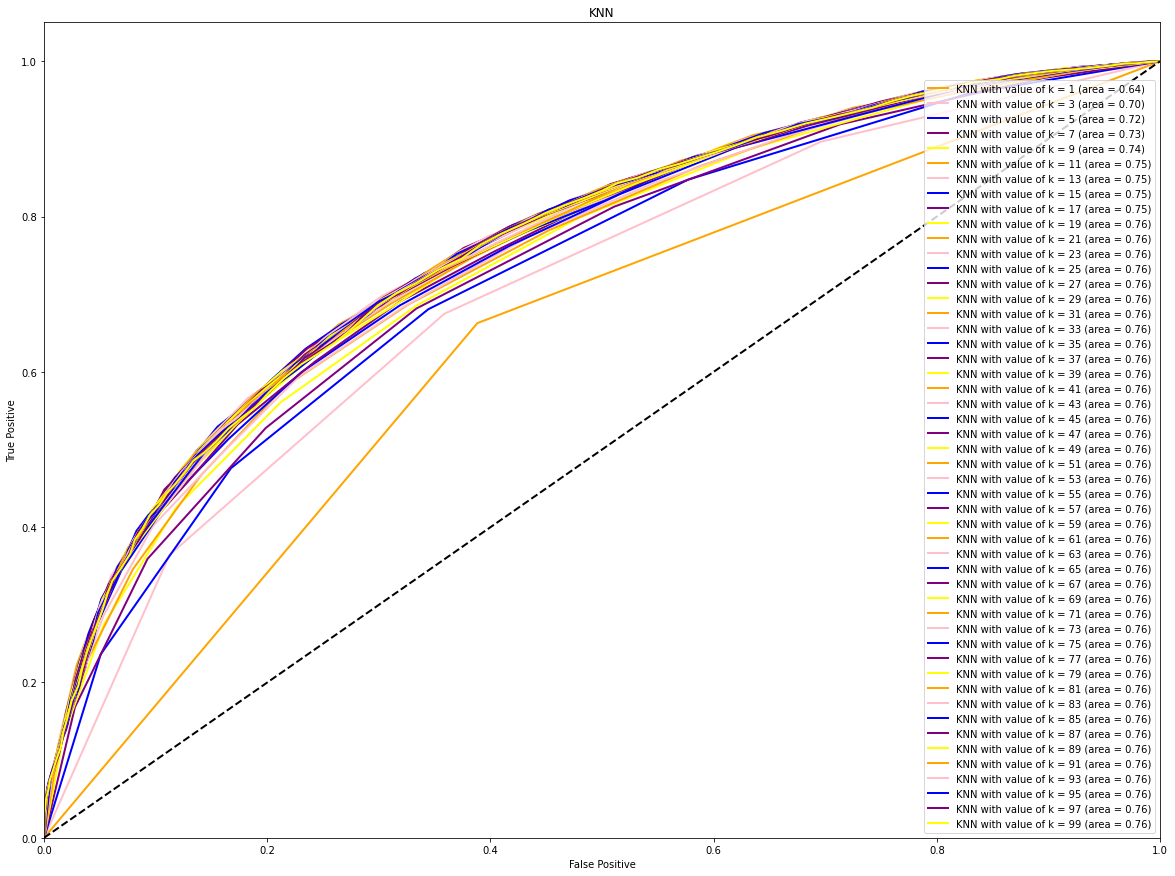

In [ ]:
from itertools import cycle
plt.rcParams["figure.figsize"] = (20,15)
# Plot all ROC curves for KNN
knn_range = 100
plt.figure()
lw = 2
maxarea = 0
value = 0
colors = cycle(['orange', 'purple', 'pink','yellow','blue'])
for i, color in zip(range(knn_range), colors):
    if  i%6 == 0 or i%6 == 4 or i%6 == 2:
        nodes=i+1
        model = knn(nodes,X_train,y_train)
        y_score = model.predict_proba(X_test)[:,1]
        fpr,tpr,_ = roc_curve(y_test, y_score)
        area = auc(fpr,tpr)
        print("Score for model with k {}: {} area{}".format(nodes,model.score(X_test,y_test),area))
        plt.plot(fpr, tpr, color=color, lw=lw,
                 label='KNN with value of k = {0} (area = {1:0.2f})'
                 ''.format(nodes, area))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('KNN')
plt.legend(loc="lower right")
plt.savefig('knn.png')
plt.show()

In [ ]:
def DT(k,X,y):
  model = DecisionTreeClassifier(max_depth=k)
  model.fit(X, y)
  return model

In [ ]:
from itertools import cycle
plt.rcParams["figure.figsize"] = (20,15)
# Plot all ROC curves for KNN
knn_range = 100
plt.figure()
lw = 2
colors = cycle(['blue', 'black', 'yellow','green','red'])
for i, color in zip(range(knn_range), colors):
    if (True):
        nodes=i+1
        model = DT(nodes,X_train,y_train)
        y_score = model.predict_proba(X_test)[:,1]
        fpr,tpr,_ = roc_curve(y_test, y_score)
        area = auc(fpr,tpr)
        print("Score for model with k {}: {}, area{}".format(nodes,model.score(X_test,y_test),area))
        plt.plot(fpr, t70pr, color=color, lw=lw,label='Decision Tree with max depth k = {0} (area = {1:0.2f})'
                 ''.format(nodes, area))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Decision Tree Classifier')
plt.legend(loc="lower right")
plt.savefig('DCT.png')
plt.show()

Score for model with k 1: 0.5873332633126772, area0.595342482522022


NameError: ignored

<Figure size 1440x1080 with 0 Axes>

In [ ]:
model1 = DecisionTreeClassifier(max_depth=8)
model2 = KNeighborsClassifier(n_neighbors=39)
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
print("Decision Tree")
print(metrics.confusion_matrix(y_test,pred1))
print(metrics.accuracy_score(y_test,pred1))
print(metrics.classification_report(y_test,pred1))
print("------------------------------------------------------------")
print("KNN")
print(metrics.confusion_matrix(y_test,pred2))
print(metrics.accuracy_score(y_test,pred2))
print(metrics.classification_report(y_test,pred2))

Decision Tree
[[3309 1320]
 [1667 3225]]
0.68627245037286
              precision    recall  f1-score   support

           0       0.66      0.71      0.69      4629
           1       0.71      0.66      0.68      4892

    accuracy                           0.69      9521
   macro avg       0.69      0.69      0.69      9521
weighted avg       0.69      0.69      0.69      9521

------------------------------------------------------------
KNN
[[3207 1422]
 [1497 3395]]
0.6934145572944018
              precision    recall  f1-score   support

           0       0.68      0.69      0.69      4629
           1       0.70      0.69      0.70      4892

    accuracy                           0.69      9521
   macro avg       0.69      0.69      0.69      9521
weighted avg       0.69      0.69      0.69      9521

